In [71]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import random

In [72]:
# Define the Rastrigin function
def rastrigin(x):
    A = 10
    n = len(x)
    return A * n + sum([(xi ** 2 - A * np.cos(2 * np.pi * xi)) for xi in x])


In [73]:
# Define bounds for the search space
lower_bound = -5.12
upper_bound = 5.12

In [74]:
# Evolution Strategy parameters
population_size = 20
mutation_probability = 0.1
mutation_step_size = 0.1
num_generations = 100
dimensions = 2  # Dimensionality of the search space


In [75]:
# Initialize a population within the search bounds
def initialize_population(population_size, dimensions, lower_bound, upper_bound):
    return np.random.uniform(lower_bound, upper_bound, (population_size, dimensions))


In [76]:
# Evaluate the fitness of the population
def evaluate_fitness(population):
    return np.array([rastrigin(individual) for individual in population])


In [77]:
# Mutation function
def mutate(individual, mutation_step_size, mutation_probability, lower_bound, upper_bound):
    for i in range(len(individual)):
        if random.random() < mutation_probability:
            # Generate mutation with a Gaussian distribution
            individual[i] += np.random.normal(0, mutation_step_size)
            # Ensure mutation stays within bounds
            individual[i] = np.clip(individual[i], lower_bound, upper_bound)
    return individual


In [78]:
# Selection function (elitism)
def select_best(population, fitness, n_best):
    best_indices = np.argsort(fitness)[:n_best]
    return population[best_indices], fitness[best_indices]


In [79]:
# Initialize the population
population = initialize_population(population_size, dimensions, lower_bound, upper_bound)
fitness = evaluate_fitness(population)

Generation 0: Best fitness = 4.1261298196610845
Generation 1: Best fitness = 4.1261298196610845
Generation 2: Best fitness = 4.1261298196610845
Generation 3: Best fitness = 4.1261298196610845
Generation 4: Best fitness = 4.1261298196610845
Generation 5: Best fitness = 2.9533522347090546
Generation 6: Best fitness = 2.9533522347090546
Generation 7: Best fitness = 2.2520083080568405
Generation 8: Best fitness = 2.2520083080568405
Generation 9: Best fitness = 2.2520083080568405
Generation 10: Best fitness = 2.2009289984280116
Generation 11: Best fitness = 2.181671665142545
Generation 12: Best fitness = 2.181671665142545
Generation 13: Best fitness = 2.181671665142545
Generation 14: Best fitness = 2.181671665142545
Generation 15: Best fitness = 2.0014297873272966
Generation 16: Best fitness = 2.0014297873272966
Generation 17: Best fitness = 2.0014297873272966
Generation 18: Best fitness = 2.0014297873272966
Generation 19: Best fitness = 2.0014297873272966
Generation 20: Best fitness = 2.00

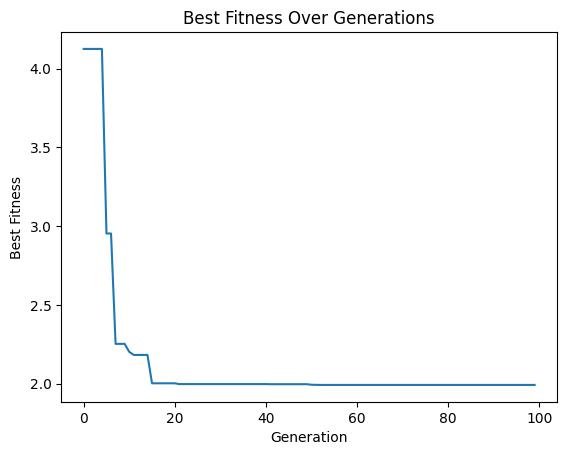

In [80]:
# Initial best solution and best fitness
best_solution = None
best_fitness = float('inf')

# Track the best fitness over generations
best_fitness_history = []

# Evolution loop
for generation in range(num_generations):
    # Generate new population through mutation
    offspring_population = np.array([
        mutate(individual.copy(), mutation_step_size, mutation_probability, lower_bound, upper_bound)
        for individual in population
    ])

    # Evaluate the fitness of the offspring
    offspring_fitness = evaluate_fitness(offspring_population)

    # Combine the current population with offspring
    combined_population = np.concatenate([population, offspring_population])
    combined_fitness = np.concatenate([fitness, offspring_fitness])

    # Select the best individuals for the next generation
    population, fitness = select_best(combined_population, combined_fitness, population_size)

    # Track the best solution found
    current_best_fitness = np.min(fitness)
    current_best_solution = population[np.argmin(fitness)]

    if current_best_fitness < best_fitness:
        best_solution = current_best_solution
        best_fitness = current_best_fitness

    best_fitness_history.append(best_fitness)

    # Logging for observation
    print(f"Generation {generation}: Best fitness = {best_fitness}")

# Plot the best fitness over generations
plt.plot(best_fitness_history)
plt.title("Best Fitness Over Generations")
plt.xlabel("Generation")
plt.ylabel("Best Fitness")
plt.show()

In [81]:
print("Best solution found:", best_solution)
print("Best fitness achieved:", best_fitness_history[-1])

Best solution found: [0.99248955 0.99463587]
Best fitness achieved: 1.991147424210265


In [82]:
# Track best fitness and population over generations
best_fitness_history = []
population_history = [population.copy()]

# Store the best fitness and population
best_fitness_history.append(np.min(fitness))
population_history.append(population.copy())
# Check the final population before plotting
final_population = population_history[-1]

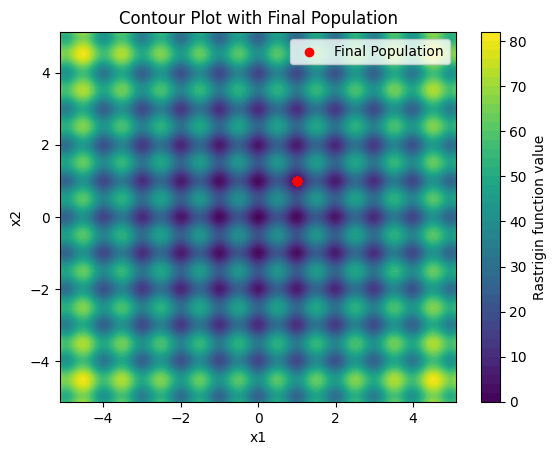

In [83]:
if final_population.size > 0:
    # Plot the contour map and final population
    x = np.linspace(lower_bound, upper_bound, 100)
    y = np.linspace(lower_bound, upper_bound, 100)
    X, Y = np.meshgrid(x, y)
    Z = np.array([rastrigin([X[i, j], Y[i, j]]) for i in range(100) for j in range(100)]).reshape(100, 100)

    plt.contourf(X, Y, Z, 50, cmap='viridis')
    plt.colorbar(label='Rastrigin function value')

    # Scatter plot the final population
    plt.scatter(final_population[:, 0], final_population[:, 1], color='red', label='Final Population')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title('Contour Plot with Final Population')
    plt.legend()
    plt.show()
else:
    print("Final population is empty or not properly initialized.")
